\hfill Department of Statistics

\hfill Jaeyeong Kim

In [2]:
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
import pandas as pd

def sigmoid(x):
    return 1/(1+np.exp(-np.float64(x)))

def logitboost(X_train, X_valid, Y_train, Y_valid, k):
    #get shapes of the train and the validation data sets
    X_train = np.matrix(X_train)
    X_valid = np.matrix(X_valid)
    n, m = X_train.shape
    n1,m1 = X_valid.shape

    #set w0 = 0
    beta = np.zeros((m,1))
    loss = np.zeros((k,2))
    ik = 0
    
    for i in range(k):
        H = np.dot(X_train,beta)
        p = sigmoid(2*H)
        w = np.multiply(p, (1-p))
        w[abs(w) < 1.e-20] = 1.e-20
        z = np.divide(((Y_train + 1)/2 - p), w)
                
        coef = np.matrix(np.zeros((2, m-1)))
        newloss = np.matrix(np.zeros((m-1,1)))
        
        for j in range(m-1):
            Xj = X_train[:, j+1]
            a = np.sum(w)
            b = np.sum(np.multiply(w, Xj))
            c = np.sum(np.multiply(w, np.multiply(Xj, Xj)))
            d = np.sum(np.multiply(w, z))
            e = np.sum(np.multiply(np.multiply(w, Xj), z))
            if (a*c - b**2) == 0:
                betaj = np.matrix([[d/a], [0]])
            else:
                betaj = 1/(a*c - b**2) * np.matrix([[c*d - b*e], [a*e - b*d]])
            Hj = H + 1/2*(betaj[0] + np.multiply(betaj[1], Xj))
            lossj = np.sum(np.log(1+np.exp(-2*np.multiply(Y_train, Hj))))
            coef[:,j] = betaj
            newloss[j] = lossj
        
        j_ = np.argmin(newloss)
        beta[0] = beta[0] + 1/2 * coef[0,j_]
        beta[j_+1] = beta[j_+1] + 1/2 * coef[1,j_]
        loss[i] = i+1, newloss[j_]
            
    return beta, loss

## gisette

In [3]:
# Reading in the gisette data set
X_train = pd.read_csv(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_train.data", header = None,\
                     delimiter = ' ').dropna(axis='columns')
Y_train = pd.read_csv(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_train.labels", header = None)

X_valid = pd.read_csv(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_valid.data", header = None, \
                     delimiter = ' ').dropna(axis='columns')
Y_valid = pd.read_csv(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_valid.labels", header = None)


#data processing
n, m = X_train.shape
n1,m1 = X_valid.shape
ones = pd.DataFrame(np.ones((n,1)))
ones1 = pd.DataFrame(np.ones((n1,1)))
X_train = pd.concat([ones, X_train], axis=1, ignore_index = True)
X_valid = pd.concat([ones1, X_valid], axis=1, ignore_index = True)


ks = np.array([10, 30, 100, 300])
error_results = []
loss_result = []
# Run logistic regression
for k in ks:
    #X_train, X_valid, Y_train, Y_valid, iteration
    beta, loss = logitboost(X_train, X_valid, Y_train, Y_valid, k)
    Y_predict_train = np.sign(np.dot(X_train, beta))
    Y_predict_valid = np.sign(np.dot(X_valid, beta))
    
    Y_score_train = 0
    Y_score_valid = 0
    for j in range(n):
        if Y_predict_train[j] == np.array(Y_train)[j]:
            Y_score_train += 1
        else :
            continue
    for j in range(n1):
        if Y_predict_valid[j] == np.array(Y_valid)[j]:
            Y_score_valid += 1
        else :
            continue
    error_train = 1 - np.sum(Y_score_train)/n
    error_test = 1 - np.sum(Y_score_valid)/n1
    
    error_results.append((k, error_train, error_test))
    if k == 300:
        loss_result = loss
        
x1 = pd.DataFrame(data = error_results, columns = ['k',\
                                'error_train', 'error_valid'])
y1 = pd.DataFrame(data = loss_result, columns = ['i', 'loss'])

x1

ValueError: matrix must be 2-dimensional

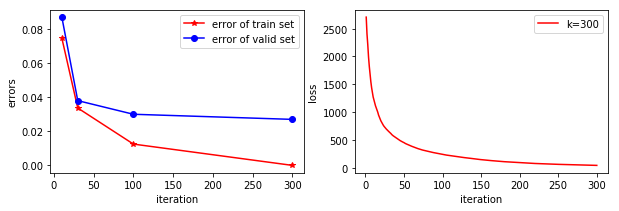

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the results
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(x1['k'], x1['error_train'], 'r-*', label='error of train set')
plt.plot(x1['k'], x1['error_valid'], 'b-o', label='error of valid set')
plt.xlabel('iteration')
plt.ylabel('errors')
plt.legend()

plt.subplot(122)
plt.plot(y1['i'], y1['loss'], 'r-', label='k=300')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

## dexter

In [33]:
# Reading in the dexter data set
X_train = pd.read_csv('dexter\dexter_train.csv', header = None)\
                      .dropna(axis='columns')
Y_train = pd.read_csv('dexter\dexter_train.labels', header = None)

X_valid = pd.read_csv('dexter\dexter_valid.csv', header = None)\
                      .dropna(axis='columns')
Y_valid = pd.read_csv('dexter\dexter_valid.labels', header = None)

#data processing
n, m = X_train.shape
n1,m1 = X_valid.shape
ones = pd.DataFrame(np.ones((n,1)))
ones1 = pd.DataFrame(np.ones((n1,1)))
X_train = pd.concat([ones, X_train], axis=1, ignore_index = True)
X_valid = pd.concat([ones1, X_valid], axis=1, ignore_index = True)


ks = np.array([10, 30, 100, 300])
error_results = []
loss_result = []
# Run logistic regression
for k in ks:
    #X_train, X_valid, Y_train, Y_valid, iteration
    beta, loss = logitboost(X_train, X_valid, Y_train, Y_valid, k)
    Y_predict_train = np.sign(np.dot(X_train, beta))
    Y_predict_valid = np.sign(np.dot(X_valid, beta))
    
    Y_score_train = 0
    Y_score_valid = 0
    for j in range(n):
        if Y_predict_train[j] == np.array(Y_train)[j]:
            Y_score_train += 1
        else :
            continue
    for j in range(n1):
        if Y_predict_valid[j] == np.array(Y_valid)[j]:
            Y_score_valid += 1
        else :
            continue
    error_train = 1 - np.sum(Y_score_train)/n
    error_test = 1 - np.sum(Y_score_valid)/n1
    
    error_results.append((k, error_train, error_test))
    if k == 300:
        loss_result = loss
        
x2 = pd.DataFrame(data = error_results, columns = ['k',\
                                'error_train', 'error_valid'])
y2 = pd.DataFrame(data = loss_result, columns = ['i', 'loss'])

x2

,k,error_train,error_valid
0,10,0.073333,0.106667
1,30,0.003333,0.093333
2,100,0.000000,0.090000
3,300,0.000000,0.083333


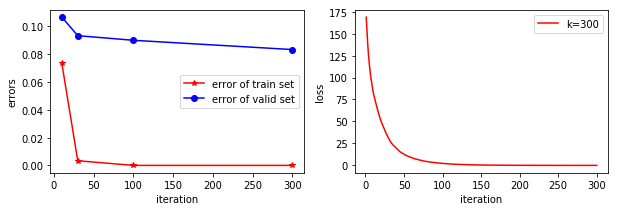

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the results
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(x2['k'], x2['error_train'], 'r-*', label='error of train set')
plt.plot(x2['k'], x2['error_valid'], 'b-o', label='error of valid set')
plt.xlabel('iteration')
plt.ylabel('errors')
plt.legend()

plt.subplot(122)
plt.plot(y2['i'], y2['loss'], 'r-', label='k=300')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

## madelon

In [6]:
# Reading in the MADELON data set
X_train = pd.read_csv('madelon\madelon_train.data', header = None,\
                      delimiter = ' ').dropna(axis='columns')
Y_train = pd.read_csv('madelon\madelon_train.labels', header = None)

X_valid = pd.read_csv('madelon\madelon_valid.data', header = None, \
                      delimiter = ' ').dropna(axis='columns')
Y_valid = pd.read_csv('madelon\madelon_valid.labels', header = None)



#data processing
n, m = X_train.shape
n1,m1 = X_valid.shape
ones = pd.DataFrame(np.ones((n,1)))
ones1 = pd.DataFrame(np.ones((n1,1)))
X_train = pd.concat([ones, X_train], axis=1, ignore_index = True)
X_valid = pd.concat([ones1, X_valid], axis=1, ignore_index = True)


ks = np.array([10, 30, 100, 300])
error_results = []
loss_result = []
# Run logistic regression
for k in ks:
    #X_train, X_valid, Y_train, Y_valid, iteration
    beta, loss = logitboost(X_train, X_valid, Y_train, Y_valid, k)
    Y_predict_train = np.sign(np.dot(X_train, beta))
    Y_predict_valid = np.sign(np.dot(X_valid, beta))
    
    Y_score_train = 0
    Y_score_valid = 0
    for j in range(n):
        if Y_predict_train[j] == np.array(Y_train)[j]:
            Y_score_train += 1
        else :
            continue
    for j in range(n1):
        if Y_predict_valid[j] == np.array(Y_valid)[j]:
            Y_score_valid += 1
        else :
            continue
    error_train = 1 - np.sum(Y_score_train)/n
    error_test = 1 - np.sum(Y_score_valid)/n1
    
    error_results.append((k, error_train, error_test))
    if k == 300:
        loss_result = loss
        
x3 = pd.DataFrame(data = error_results, columns = ['k',\
                                'error_train', 'error_valid'])
y3 = pd.DataFrame(data = loss_result, columns = ['i', 'loss'])

x3

,k,error_train,error_valid
0,10,0.3770,0.403333
1,30,0.3450,0.428333
2,100,0.3090,0.433333
3,300,0.2695,0.431667


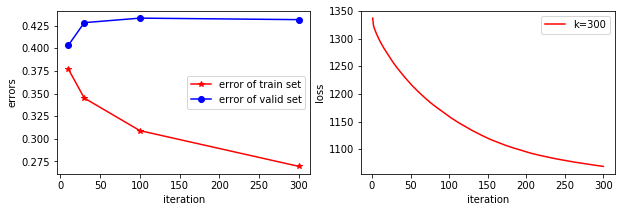

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the results
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(x3['k'], x3['error_train'], 'r-*', label='error of train set')
plt.plot(x3['k'], x3['error_valid'], 'b-o', label='error of valid set')
plt.xlabel('iteration')
plt.ylabel('errors')
plt.legend()

plt.subplot(122)
plt.plot(y3['i'], y3['loss'], 'r-', label='k=300')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()
